In [11]:
import bz2
import os

from urllib.request import urlopen

In [21]:
def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()
    
    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024 )
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)

In [22]:
dst_dir = 'models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

In [23]:
if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

In [1]:
from model import create_model

Using TensorFlow backend.


In [2]:
nn4_small2_pretrained = create_model()

In [3]:
nn4_small2_pretrained.load_weights('nn4.small2.v1.h5')

In [4]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [5]:
from align import AlignDlib

In [6]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [7]:
#from PIL import Image  
#import PIL

In [10]:
# Python program to explain cv2.imwrite() method 
  
# importing cv2  
import cv2 
# importing os module   
import os 
def captura():
    cam=cv2.VideoCapture(0)
    while 1:
        ret, frame=cam.read()
        cv2.imshow('Captura', frame)
        
        if ret==False: break
        
        key=cv2.waitKey(1)
        
        if key%256==27: break # tecla ESC
        
        elif key%256==32: # SPACE
            img_name='captura.jpg'
            cv2.imwrite(img_name, frame)
            print ('Captura guardada')
            # Image path 
            image_path = r'C:\Users\diego\datamex1019\module-3\final-project\captura.jpg'
  
            # Image directory 
            directory = r'C:\Users\diego\datamex1019\module-3\final-project\Untitled Folder\Untitled Folder'

#comparacion 
#posible 
            # Using cv2.imread() method 
            # to read the image 
            img = cv2.imread(image_path) 
  
            # Change the current directory  
            # to specified directory  
            os.chdir(directory) 

            # List files and directories   
            # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'   
            print("Before saving image:")   
            print(os.listdir(directory))   
  
            # Filename 
            filename = 'savedImage.jpg'
  
            # Using cv2.imwrite() method 
            # Saving the image 
            cv2.imwrite(filename, img) 
  
            # List files and directories   
            # in 'C:/Users / Rajnish / Desktop / GeeksforGeeks'   
            print("After saving image:")   
            print(os.listdir(directory)) 
  
            print('Successfully saved') 
            break
            
    cam.release()
    cv2.destroyAllWindows()

In [11]:
captura()

Captura guardada
Before saving image:
['.ipynb_checkpoints', 'captura.jpg', 'savedImage.jpg', 't.jpg']
After saving image:
['.ipynb_checkpoints', 'captura.jpg', 'savedImage.jpg', 't.jpg']
Successfully saved


In [7]:
metadata = load_metadata('images')

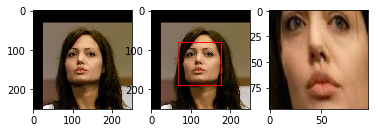

In [8]:
# Cargar las marcas para reconocer caras
alignment = AlignDlib('models/landmarks.dat')

# Cargar foto
jc_orig = load_image(metadata[6].image_path())

# Detección de cara y crear caja alrededor 
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transformar a 96 usando landmarks 
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Imagen original
plt.subplot(131)
plt.imshow(jc_orig)

#Imagen con caja
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Imagen recortada
plt.subplot(133)
plt.imshow(jc_aligned);

In [9]:
#define for future use
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

In [43]:
from progressbar import ProgressBar
#Cargando imagenes y usandolas para predecir con la CNN
num_images = metadata.shape[0]
progress = ProgressBar(num_images)
progress.start()
embedded = np.zeros((num_images, 128))
for i, m in enumerate(metadata):

    img = load_image(m.image_path())
    img = align_image(img)

    # scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    # obtain embedding vector for image
    embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
    progress.update(i)

In [10]:
import pickle

In [45]:
pickle_out=open('embedded.pickle','wb')
pickle.dump(embedded,pickle_out)
pickle_out.close()

In [11]:
pickle_in=open('embedded.pickle','rb')

In [12]:
embedded=pickle.load(pickle_in)

In [13]:
metada = load_metadata('comparacion')

In [46]:
las=[]
for i, m in enumerate(metada):
    print(m.image_path())
    print(type(img))
    print(i)
    img = load_image(m.image_path())
    img = align_image(img)
    # normalizar los valores dividiendo con el máximo valor
    img = (img / 255.).astype(np.float32)
    # obteniendo los vectores apartir de la predicción de la CNN 
    las.append(nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0])
#imagen_a_comparar

comparacion\posible\DSC_0008.jpg
<class 'numpy.ndarray'>
0
comparacion\posible\DSC_0025.jpg
<class 'numpy.ndarray'>
1
comparacion\posible\DSC_0047.jpg
<class 'numpy.ndarray'>
2
comparacion\posible\DSC_0067.jpg
<class 'numpy.ndarray'>
3
comparacion\posible\DSC_0087.jpg
<class 'numpy.ndarray'>
4
comparacion\posible\DSC_0144.jpg
<class 'numpy.ndarray'>
5
comparacion\posible\DSC_0147.jpg
<class 'numpy.ndarray'>
6
comparacion\posible\DSC_0179.jpg
<class 'numpy.ndarray'>
7
comparacion\posible\DSC_0226.jpg
<class 'numpy.ndarray'>
8
comparacion\posible\DSC_0234.jpg
<class 'numpy.ndarray'>
9
comparacion\posible\DSC_0236.jpg
<class 'numpy.ndarray'>
10


In [14]:
#Calculando la distancias
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(10,5))
    plt.suptitle(f'Distance = {distance(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path())); 

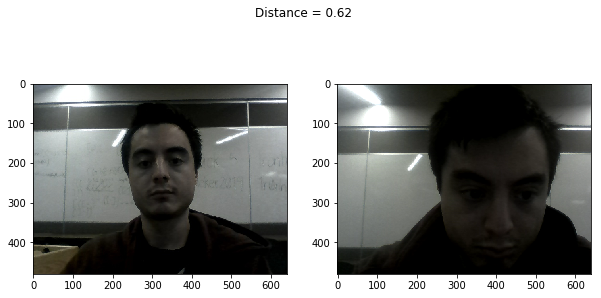

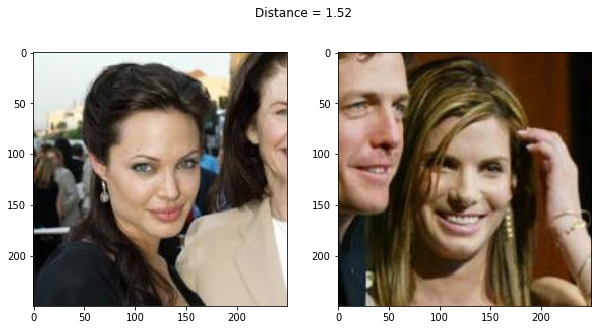

In [15]:
show_pair(60,61)
show_pair(2,102)

In [17]:
lst=[]
for j in range(len(las)):
    print(j)
    imagen_a_comparar=las[j]
    for i in range(len(embedded)):
        lst.append(distance(imagen_a_comparar,embedded[i]))
    if min(lst)<0.5:
        print(min(lst))
        print('Es empleado')
    else:
        print(min(lst))
    lst=[]

NameError: name 'las' is not defined

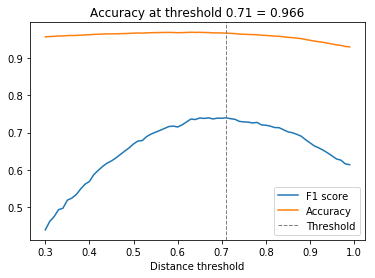

In [16]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] # distancia entre pares
identical = [] # en caso de que sean iguales es 1 y si no es 0

num = len(metadata)

for i in range(num - 1):
    for j in range(1, num):
        distances.append(distance(embedded[i], embedded[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='grey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

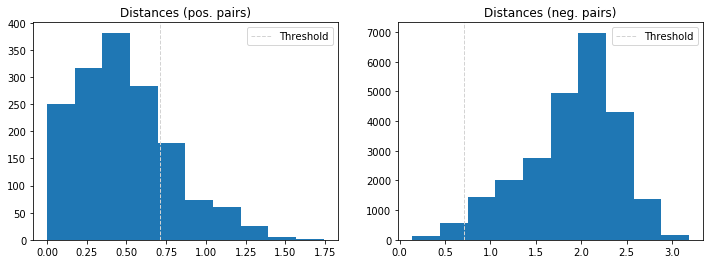

In [17]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]
#La distancia entre caras de la misma persona y de diferentes personas 
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (pos. pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (neg. pairs)')
plt.legend();

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Tranformando las etiquetas a numeros
y = encoder.transform(targets)

test_idx = np.arange(metadata.shape[0]) % 2 != 0
train_idx = np.arange(metadata.shape[0]) % 2 == 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')

KNN accuracy = 0.9259259259259259, SVM accuracy = 0.9259259259259259


In [19]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')
    
def show_predictions(indexes):
    plt.figure(figsize=(16,16))
    
    for i, idx in enumerate(indexes[:16]):
        example_image = load_image(metadata[test_idx][idx].image_path())
        example_prediction = svc.predict([embedded[test_idx][idx]])
        example_identity = encoder.inverse_transform(example_prediction)[0]
        
        plt.subplot(4,4,i+1)
        plt.imshow(example_image)
        plt.title(f'Recognized as {example_identity}');        

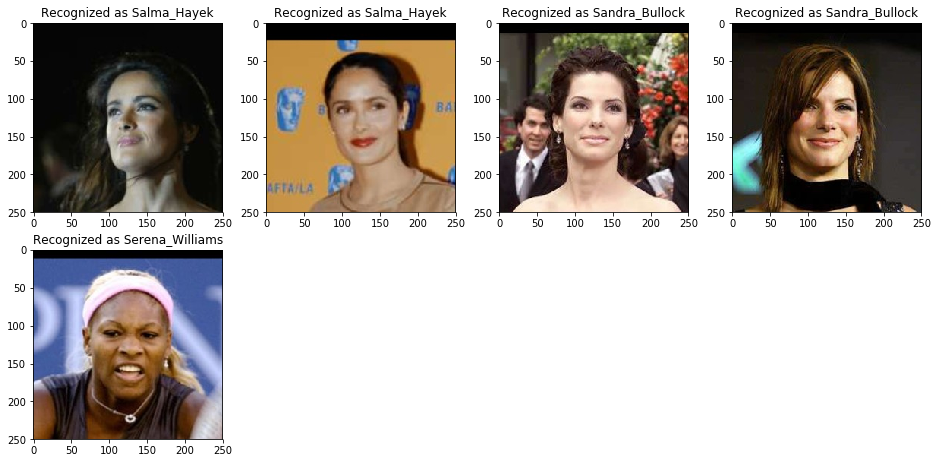

In [22]:
show_predictions(range(47,52))

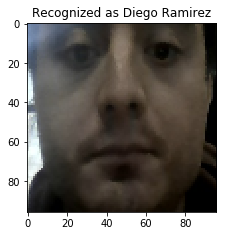

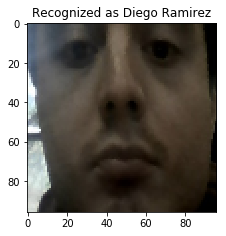

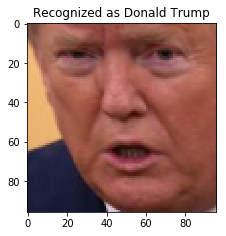

In [20]:
las=[]
metada = load_metadata('Untitled Folder')
for i, m in enumerate(metada):
    img = load_image(m.image_path())
    img = align_image(img)
    # normalizar los valores dividiendo con el máximo valor
    img = (img / 255.).astype(np.float32)
    # obteniendo los vectores apartir de la predicción de la CNN 
    las.append(nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0])
    example_prediction = knn.predict([las[i]])
    example_identity = encoder.inverse_transform(example_prediction)[0]
    
    plt.figure(figsize=(16,16))
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.title(f'Recognized as {example_identity}');

[1, 10, 18, 55, 77, 80]


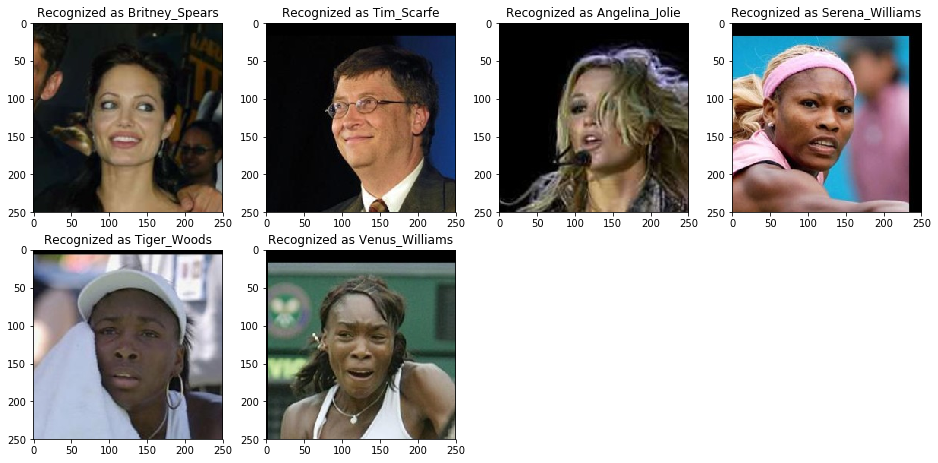

In [21]:
error_pairs = []
#Errores en reconocimiento de imagenes
for i, item in enumerate(y_pred_knn):
    if item != y_test[i]:
        error_pairs.append(i)
        
print(error_pairs)

show_predictions(error_pairs)

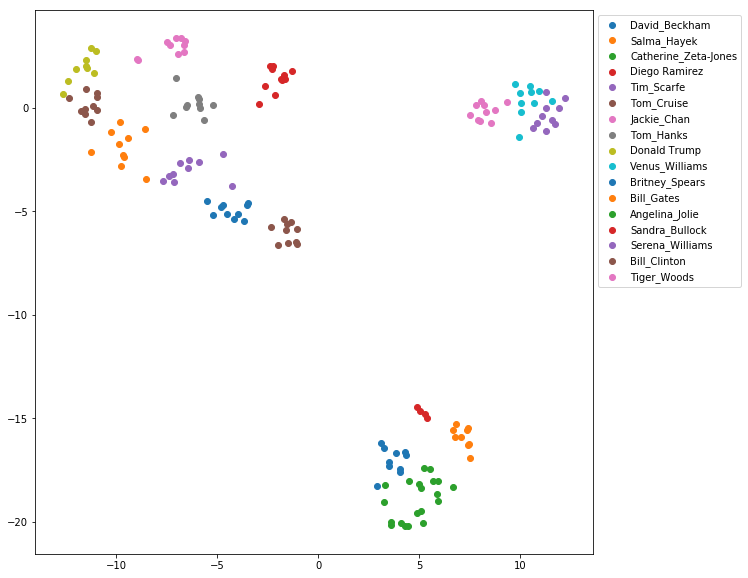

In [22]:
from sklearn.manifold import TSNE
#Que tan cerca están los rostros
X_embedded = TSNE(n_components=2).fit_transform(embedded)

plt.figure(figsize=(10,10))

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));